In [13]:
# basic
from importlib import reload
import numpy as np
import pandas as pd
import os
import ast

# aesthetics
import matplotlib.pyplot as plt

# nlp-related
import spacy
import gensim
from wordcloud import WordCloud

from source import topic_modelling as tm

In [3]:
df = pd.read_pickle('dfs/preprocessed-cleaned-df.pkl')

In [11]:
texts = df['professor_clean'] + df['student_clean']
dic=gensim.corpora.Dictionary(texts)
bow_corpus = [dic.doc2bow(doc) for doc in texts] # BOW

[I 2025-12-23 15:47:21,110] A new study created in memory with name: LDA-topic-modelling
[I 2025-12-23 15:47:42,754] Trial 0 finished with value: 0.4000445178954823 and parameters: {'num_topics': 17}. Best is trial 0 with value: 0.4000445178954823.
[I 2025-12-23 15:48:04,472] Trial 1 finished with value: 0.39767943691519464 and parameters: {'num_topics': 18}. Best is trial 0 with value: 0.4000445178954823.
[I 2025-12-23 15:48:23,802] Trial 2 finished with value: 0.4836558723848343 and parameters: {'num_topics': 20}. Best is trial 2 with value: 0.4836558723848343.


Best trial: {'num_topics': 20}


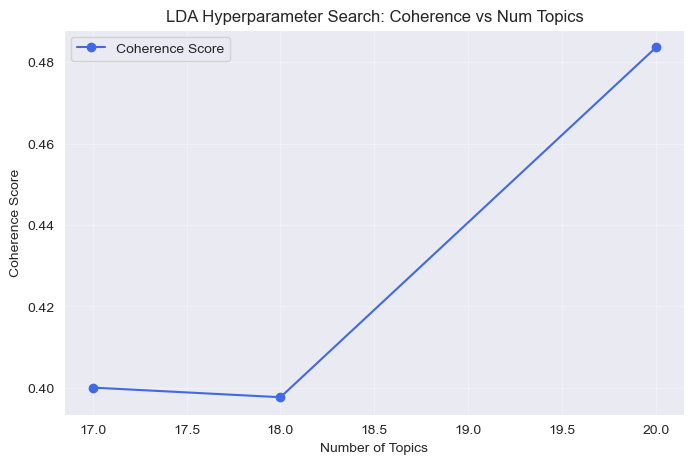

In [14]:
# Search the space for the best solution
ev_metric = tm.find_best_LDA(
    corpus=bow_corpus,
    id2word=dic,
    passes=5,
    texts=texts,
    coherence='c_v',
    n_trials=3
)
ev_metric.to_csv(f'dfs/LDA_ev_metric.csv')

In [15]:
print(ev_metric.head())

   number  coherence_score             datetime_start  \
0       0         0.400045 2025-12-23 15:47:21.125743   
1       1         0.397679 2025-12-23 15:47:42.756317   
2       2         0.483656 2025-12-23 15:48:04.472064   

           datetime_complete               duration  params_num_topics  \
0 2025-12-23 15:47:42.754322 0 days 00:00:21.628579                 17   
1 2025-12-23 15:48:04.472064 0 days 00:00:21.715747                 18   
2 2025-12-23 15:48:23.802652 0 days 00:00:19.330588                 20   

      state  
0  COMPLETE  
1  COMPLETE  
2  COMPLETE  


In [16]:
# Run the best LDA model
best_lda = tm.create_LDA_model(corpus=bow_corpus,
                                num_topics=17,
                                id2word=dic,
                                passes=10)

In [17]:
# Plot the results
tm.plot_lda_vis(lda_model=best_lda,
                corpus=bow_corpus,
                dic=dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.110108 -0.000149       1        1  18.187251
11     0.080455 -0.050715       2        1  11.870095
2      0.114407 -0.091907       3        1   9.937043
12     0.040448 -0.092551       4        1   8.278022
16     0.049603 -0.002785       5        1   7.890390
5     -0.029640 -0.107407       6        1   7.472260
10    -0.180427 -0.154927       7        1   5.804294
14     0.112219  0.065735       8        1   5.338941
6     -0.099008  0.076777       9        1   4.566105
0     -0.016322  0.094928      10        1   3.625714
7     -0.024249 -0.010516      11        1   3.323127
13     0.048124  0.021465      12        1   2.876125
8      0.029107  0.026374      13        1   2.510231
4     -0.092599  0.052703      14        1   2.375501
3     -0.088141  0.028747      15        1   2.205510
9     -0.084172  0.086209      16        1   1.874603
1      0.030086  0.058018      17        1   1.864788, topic_info=            Term        Freq       Total Category  logprob  loglift
352      ability  118.000000  118.000000  Default  30.0000  30.0000
433        power   21.000000   21.000000  Default  29.0000  29.0000
327         idea   25.000000   25.000000  Default  28.0000  28.0000
457       debate   20.000000   20.000000  Default  27.0000  27.0000
338        speak    9.000000    9.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
425  disposition    0.561149   15.440861  Topic17  -4.9189   0.6672
60          mean    0.560935   36.435383  Topic17  -4.9192  -0.1917
196         kind    0.560803   12.686410  Topic17  -4.9195   0.8631
201         play    0.560760   23.682398  Topic17  -4.9196   0.2388
353       action    0.560546   21.530262  Topic17  -4.9199   0.3337

[970 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
66        1  0.591477   abduction
66        2  0.295739   abduction
66        9  0.147869   abduction
244       1  0.231283  abhidharma
244       5  0.231283  abhidharma
...     ...       ...         ...
177       5  0.323388         yes
177       6  0.161694         yes
177       7  0.161694         yes
177      14  0.161694         yes
47       10  0.717181   yesterday

[1662 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 12, 3, 13, 17, 6, 11, 15, 7, 1, 8, 14, 9, 5, 4, 10, 2])

C:\Users\Dell\miniconda3\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


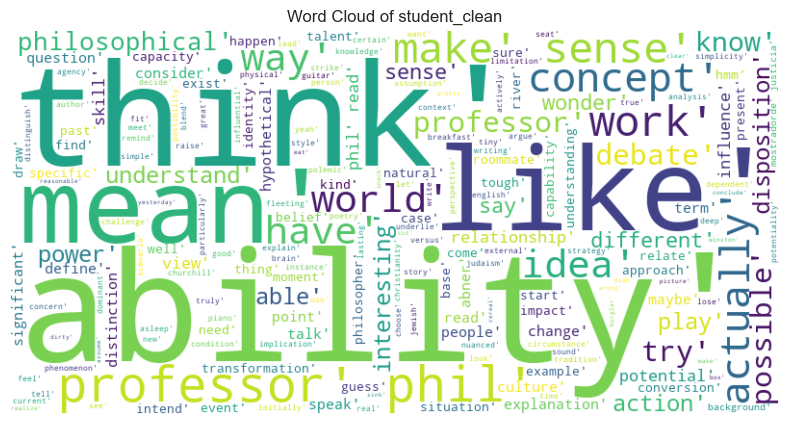

C:\Users\Dell\miniconda3\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


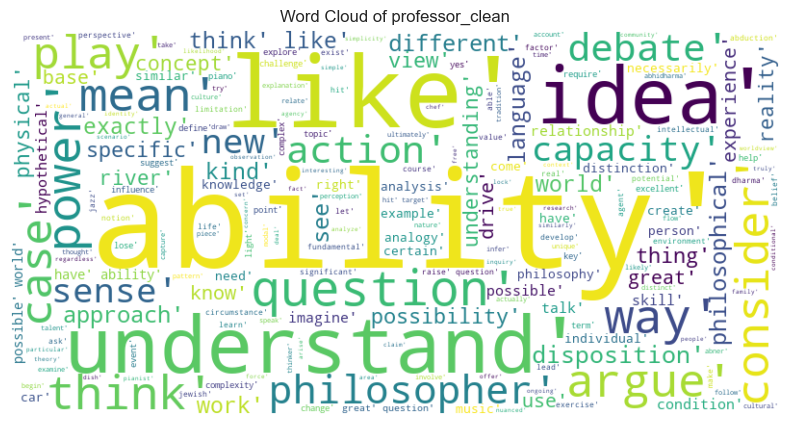

In [20]:
# Generate wordcloud
for column in ['student_clean', 'professor_clean']:
    wd_text = " ".join(df[column].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wd_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud of {column}")
    plt.show()